In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('D:/Python_Projects/Regression/NFLX.csv')
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [20]:
df.shape

(1009, 6)

In [21]:
df.isna()

,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1004,False,False,False,False,False,False
1005,False,False,False,False,False,False
1006,False,False,False,False,False,False
1007,False,False,False,False,False,False


In [22]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
X = df.copy()
y = X.pop('Close')

In [24]:
X

,Open,High,Low,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,9905200


In [25]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=30)

In [27]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume' ]]

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


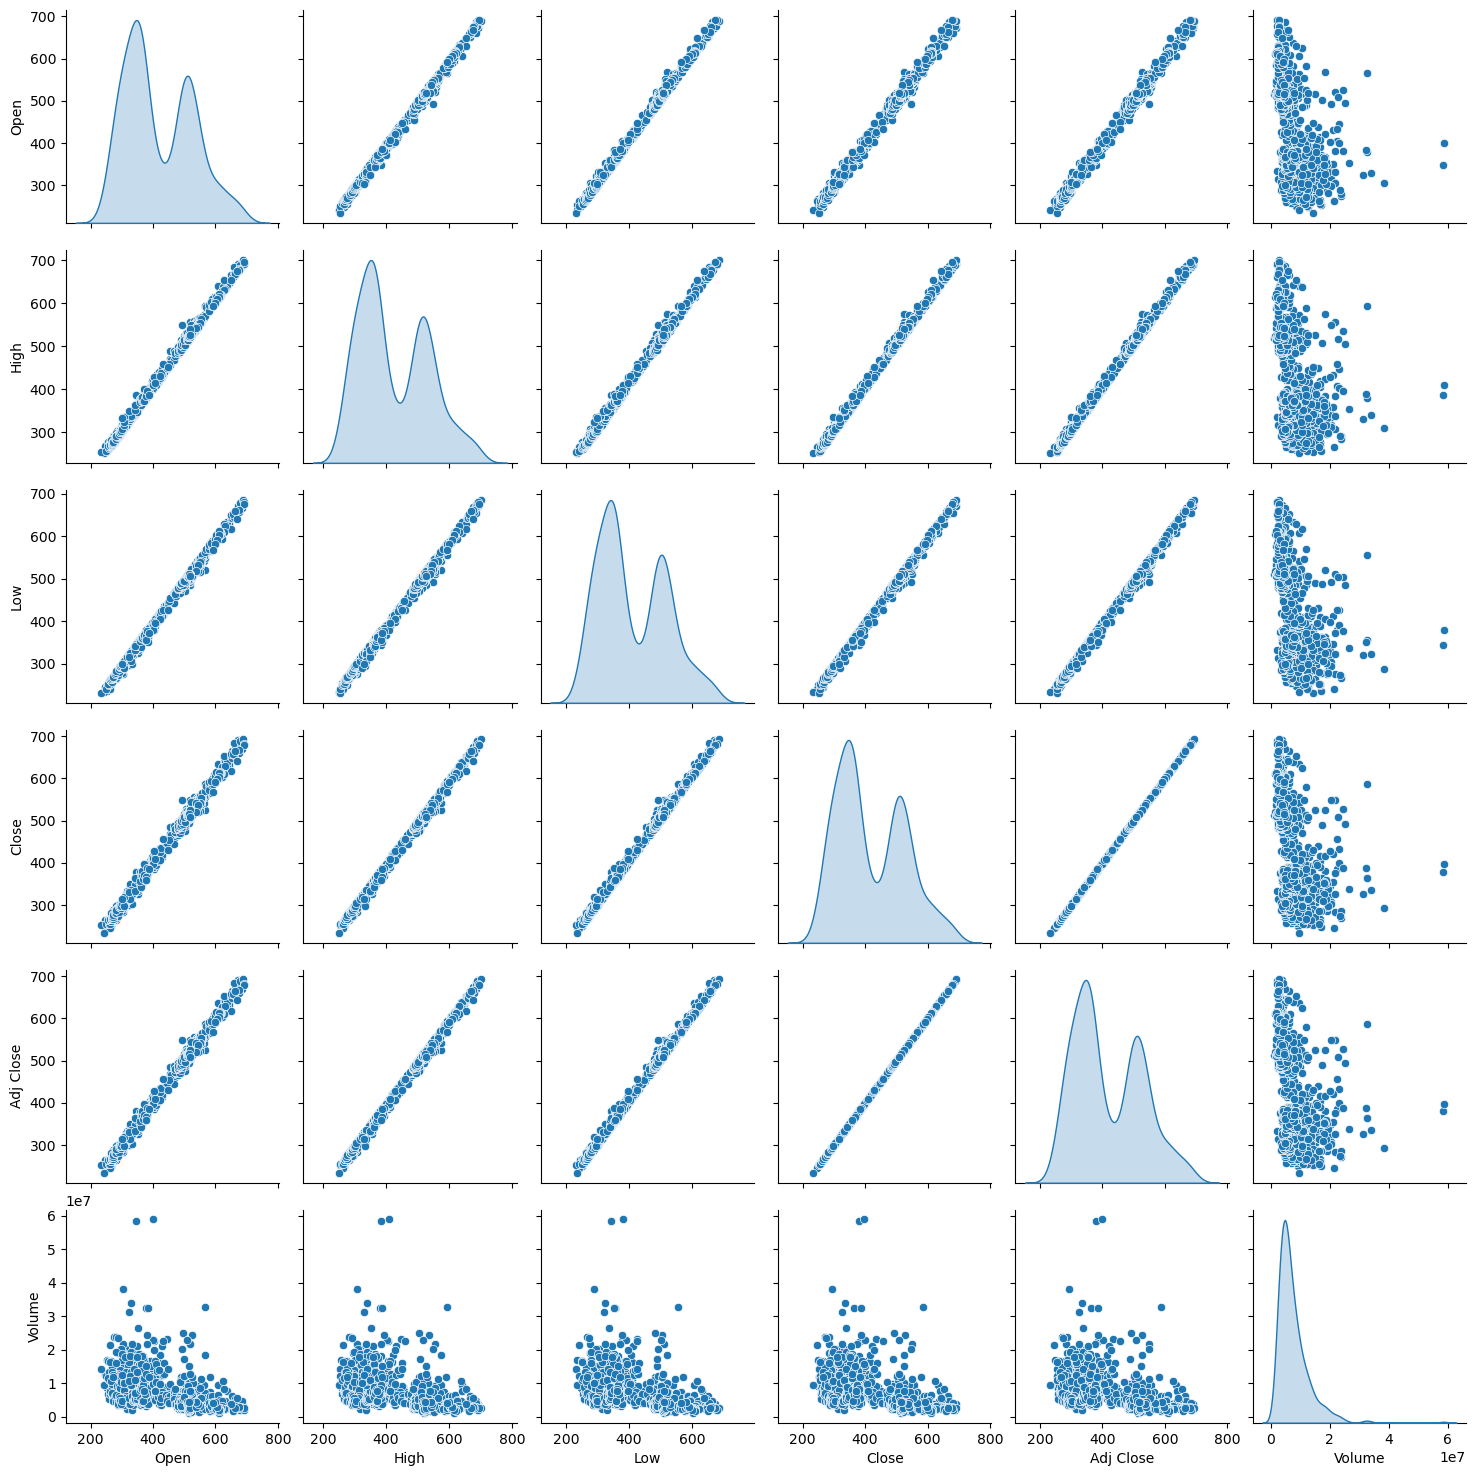

In [28]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], diag_kind='kde')

In [29]:
X.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,419.06,108.54,233.92,331.49,377.77,509.13,692.35
High,1009.0,425.32,109.26,250.65,336.30,383.01,515.63,700.99
Low,1009.0,412.37,107.56,231.23,326.00,370.88,502.53,686.09
Adj Close,1009.0,419.00,108.29,233.88,331.62,378.67,509.08,691.69
Volume,1009.0,7570685.03,5465535.23,1144000.00,4091900.00,5934500.00,9322400.00,58904300.00


In [30]:
#Normalization

X.describe().transpose()[['mean', 'std']]

,mean,std
Open,4.190597e+02,1.085375e+02
High,4.253207e+02,1.092630e+02
Low,4.123740e+02,1.075559e+02
Adj Close,4.190007e+02,1.082900e+02
Volume,7.570685e+06,5.465535e+06


In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(X))

print(normalizer.mean.numpy())

[[4.1905963e+02 4.2532068e+02 4.1237399e+02 4.1900070e+02 7.5706825e+06]]


In [32]:
first = np.array(X[:1])

with np.printoptions(precision=2):
    print('First example:', first)
    print()
    print('Normalized first example:', normalizer(first).numpy())

First example: [[2.62e+02 2.68e+02 2.50e+02 2.54e+02 1.19e+07]]

Normalized first example: [[-1.45 -1.44 -1.51 -1.52  0.79]]


In [33]:
#Linear model

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=2)
])

In [34]:
linear_model.predict(X_train[:10])

array([[ 0.43842363,  0.1520804 ],
       [ 0.237957  ,  0.06155449],
       [-0.18735301, -0.14547786],
       [-0.0779061 , -0.09186807],
       [ 0.34012395,  0.03754287],
       [ 0.30312333,  0.06056232],
       [ 0.01601784,  0.00416366],
       [ 0.40838438,  0.0575856 ],
       [-0.21856785, -0.09530926],
       [-0.52732337, -0.24790666]], dtype=float32)

In [37]:
y_train

43     289.929993
149    348.679993
731    524.590027
841    485.809998
309    370.540009
          ...    
625    485.799988
234    324.660004
751    532.390015
32     306.700012
421    270.720001
Name: Close, Length: 645, dtype: float64

In [38]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [47]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=500,
    verbose=2,
    validation_split = 0.2)

Epoch 1/500
17/17 - 0s - loss: 248.0534 - val_loss: 249.5463 - 78ms/epoch - 5ms/step
Epoch 2/500
17/17 - 0s - loss: 246.3820 - val_loss: 247.9014 - 53ms/epoch - 3ms/step


C:\Users\sneda\anaconda3\envs\PythonGPU\lib\site-packages\keras\engine\data_adapter.py:1510: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 3/500
17/17 - 0s - loss: 244.5748 - val_loss: 246.2332 - 55ms/epoch - 3ms/step
Epoch 4/500
17/17 - 0s - loss: 242.8615 - val_loss: 244.5517 - 52ms/epoch - 3ms/step
Epoch 5/500
17/17 - 0s - loss: 241.1601 - val_loss: 242.8839 - 50ms/epoch - 3ms/step
Epoch 6/500
17/17 - 0s - loss: 239.4223 - val_loss: 241.1884 - 50ms/epoch - 3ms/step
Epoch 7/500
17/17 - 0s - loss: 237.7060 - val_loss: 239.4888 - 48ms/epoch - 3ms/step
Epoch 8/500
17/17 - 0s - loss: 236.0357 - val_loss: 237.7861 - 48ms/epoch - 3ms/step
Epoch 9/500
17/17 - 0s - loss: 234.3627 - val_loss: 236.1281 - 38ms/epoch - 2ms/step
Epoch 10/500
17/17 - 0s - loss: 232.5673 - val_loss: 234.4502 - 50ms/epoch - 3ms/step
Epoch 11/500
17/17 - 0s - loss: 230.8455 - val_loss: 232.7839 - 49ms/epoch - 3ms/step
Epoch 12/500
17/17 - 0s - loss: 229.1330 - val_loss: 231.1224 - 55ms/epoch - 3ms/step
Epoch 13/500
17/17 - 0s - loss: 227.4380 - val_loss: 229.4679 - 42ms/epoch - 2ms/step
Epoch 14/500
17/17 - 0s - loss: 225.6433 - val_loss: 227.7634

Epoch 99/500
17/17 - 0s - loss: 80.2532 - val_loss: 85.4442 - 59ms/epoch - 3ms/step
Epoch 100/500
17/17 - 0s - loss: 78.6487 - val_loss: 83.8448 - 48ms/epoch - 3ms/step
Epoch 101/500
17/17 - 0s - loss: 76.9779 - val_loss: 82.1469 - 47ms/epoch - 3ms/step
Epoch 102/500
17/17 - 0s - loss: 75.3231 - val_loss: 80.4232 - 39ms/epoch - 2ms/step
Epoch 103/500
17/17 - 0s - loss: 73.6827 - val_loss: 78.6910 - 48ms/epoch - 3ms/step
Epoch 104/500
17/17 - 0s - loss: 71.9789 - val_loss: 77.0102 - 41ms/epoch - 2ms/step
Epoch 105/500
17/17 - 0s - loss: 70.3232 - val_loss: 75.3574 - 40ms/epoch - 2ms/step
Epoch 106/500
17/17 - 0s - loss: 68.6837 - val_loss: 73.6884 - 55ms/epoch - 3ms/step
Epoch 107/500
17/17 - 0s - loss: 67.0586 - val_loss: 72.0376 - 41ms/epoch - 2ms/step
Epoch 108/500
17/17 - 0s - loss: 65.4266 - val_loss: 70.4668 - 49ms/epoch - 3ms/step
Epoch 109/500
17/17 - 0s - loss: 63.8290 - val_loss: 68.7885 - 57ms/epoch - 3ms/step
Epoch 110/500
17/17 - 0s - loss: 62.2178 - val_loss: 67.1130 - 40m

Epoch 197/500
17/17 - 0s - loss: 2.6883 - val_loss: 2.6905 - 59ms/epoch - 3ms/step
Epoch 198/500
17/17 - 0s - loss: 2.6839 - val_loss: 2.6701 - 51ms/epoch - 3ms/step
Epoch 199/500
17/17 - 0s - loss: 2.6626 - val_loss: 2.6832 - 41ms/epoch - 2ms/step
Epoch 200/500
17/17 - 0s - loss: 2.6686 - val_loss: 2.6351 - 61ms/epoch - 4ms/step
Epoch 201/500
17/17 - 0s - loss: 2.6433 - val_loss: 2.6288 - 44ms/epoch - 3ms/step
Epoch 202/500
17/17 - 0s - loss: 2.6466 - val_loss: 2.6107 - 48ms/epoch - 3ms/step
Epoch 203/500
17/17 - 0s - loss: 2.6340 - val_loss: 2.6181 - 49ms/epoch - 3ms/step
Epoch 204/500
17/17 - 0s - loss: 2.6008 - val_loss: 2.5950 - 47ms/epoch - 3ms/step
Epoch 205/500
17/17 - 0s - loss: 2.6020 - val_loss: 2.6018 - 61ms/epoch - 4ms/step
Epoch 206/500
17/17 - 0s - loss: 2.5878 - val_loss: 2.5594 - 49ms/epoch - 3ms/step
Epoch 207/500
17/17 - 0s - loss: 2.5608 - val_loss: 2.5505 - 43ms/epoch - 3ms/step
Epoch 208/500
17/17 - 0s - loss: 2.5429 - val_loss: 2.5417 - 49ms/epoch - 3ms/step
Epoc

Epoch 296/500
17/17 - 0s - loss: 1.5432 - val_loss: 1.5587 - 49ms/epoch - 3ms/step
Epoch 297/500
17/17 - 0s - loss: 1.5426 - val_loss: 1.5494 - 43ms/epoch - 3ms/step
Epoch 298/500
17/17 - 0s - loss: 1.5271 - val_loss: 1.5527 - 47ms/epoch - 3ms/step
Epoch 299/500
17/17 - 0s - loss: 1.5261 - val_loss: 1.5293 - 42ms/epoch - 2ms/step
Epoch 300/500
17/17 - 0s - loss: 1.5060 - val_loss: 1.5164 - 61ms/epoch - 4ms/step
Epoch 301/500
17/17 - 0s - loss: 1.4728 - val_loss: 1.5111 - 36ms/epoch - 2ms/step
Epoch 302/500
17/17 - 0s - loss: 1.4718 - val_loss: 1.5287 - 49ms/epoch - 3ms/step
Epoch 303/500
17/17 - 0s - loss: 1.4610 - val_loss: 1.5066 - 57ms/epoch - 3ms/step
Epoch 304/500
17/17 - 0s - loss: 1.4666 - val_loss: 1.4945 - 39ms/epoch - 2ms/step
Epoch 305/500
17/17 - 0s - loss: 1.4424 - val_loss: 1.4779 - 48ms/epoch - 3ms/step
Epoch 306/500
17/17 - 0s - loss: 1.4308 - val_loss: 1.4663 - 49ms/epoch - 3ms/step
Epoch 307/500
17/17 - 0s - loss: 1.4452 - val_loss: 1.4681 - 49ms/epoch - 3ms/step
Epoc

Epoch 395/500
17/17 - 0s - loss: 0.7936 - val_loss: 0.8032 - 49ms/epoch - 3ms/step
Epoch 396/500
17/17 - 0s - loss: 0.7952 - val_loss: 0.8838 - 50ms/epoch - 3ms/step
Epoch 397/500
17/17 - 0s - loss: 0.7891 - val_loss: 0.8365 - 48ms/epoch - 3ms/step
Epoch 398/500
17/17 - 0s - loss: 0.8029 - val_loss: 0.8119 - 48ms/epoch - 3ms/step
Epoch 399/500
17/17 - 0s - loss: 0.7582 - val_loss: 0.7832 - 50ms/epoch - 3ms/step
Epoch 400/500
17/17 - 0s - loss: 0.7607 - val_loss: 0.8083 - 41ms/epoch - 2ms/step
Epoch 401/500
17/17 - 0s - loss: 0.7793 - val_loss: 0.7859 - 49ms/epoch - 3ms/step
Epoch 402/500
17/17 - 0s - loss: 0.7547 - val_loss: 0.8404 - 49ms/epoch - 3ms/step
Epoch 403/500
17/17 - 0s - loss: 0.7434 - val_loss: 0.7582 - 60ms/epoch - 4ms/step
Epoch 404/500
17/17 - 0s - loss: 0.7399 - val_loss: 0.7759 - 48ms/epoch - 3ms/step
Epoch 405/500
17/17 - 0s - loss: 0.7388 - val_loss: 0.7543 - 49ms/epoch - 3ms/step
Epoch 406/500
17/17 - 0s - loss: 0.7851 - val_loss: 0.7502 - 49ms/epoch - 3ms/step
Epoc

Epoch 494/500
17/17 - 0s - loss: 0.5304 - val_loss: 0.6241 - 42ms/epoch - 2ms/step
Epoch 495/500
17/17 - 0s - loss: 0.5174 - val_loss: 0.5287 - 42ms/epoch - 2ms/step
Epoch 496/500
17/17 - 0s - loss: 0.5127 - val_loss: 0.5341 - 50ms/epoch - 3ms/step
Epoch 497/500
17/17 - 0s - loss: 0.5178 - val_loss: 0.5296 - 48ms/epoch - 3ms/step
Epoch 498/500
17/17 - 0s - loss: 0.5135 - val_loss: 0.5505 - 48ms/epoch - 3ms/step
Epoch 499/500
17/17 - 0s - loss: 0.5175 - val_loss: 0.5533 - 48ms/epoch - 3ms/step
Epoch 500/500
17/17 - 0s - loss: 0.5226 - val_loss: 0.5292 - 50ms/epoch - 3ms/step
CPU times: total: 34.9 s
Wall time: 24.5 s


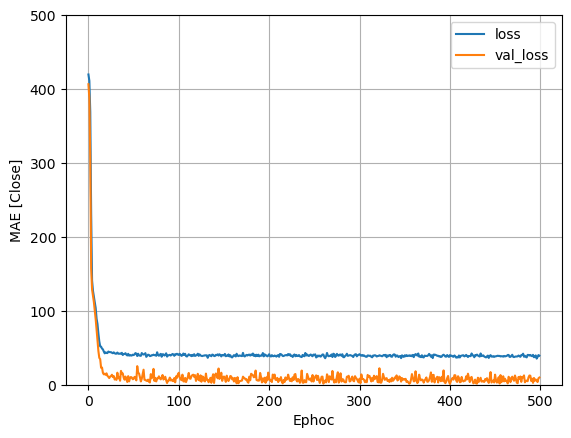

In [92]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 500])
    plt.xlabel('Ephoc')
    plt.ylabel('MAE [Close]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [93]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(X_test, y_test, verbose=0)

In [94]:
test_results

{'linear_model': 0.5245760083198547}

In [95]:
#Multilayer perceptron

def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(32, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

    return model

In [96]:
log_dir = "D:/Python_Projects/Regression/logs/fit/256-to-32"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_181 (Dense)           (None, 256)               1536      
                                                                 
 dropout_143 (Dropout)       (None, 256)               0         
                                                                 
 dense_182 (Dense)           (None, 128)               32896     
                                                                 
 dropout_144 (Dropout)       (None, 128)               0         
                                                                 
 dense_183 (Dense)           (None, 32)                4128      
                                                     

7/7 [==============================] - 0s 3ms/step - loss: 6.5338


6.533759117126465

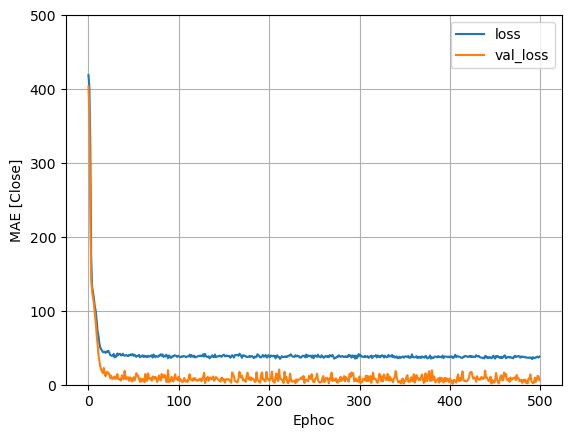

In [97]:
log_dir = "D:/Python_Projects/Regression/logs/fit/256-to-32"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    verbose=0, epochs=500, 
    callbacks=[tensorboard_callback])

plot_loss(history)
dnn_model.evaluate(X_test, y_test, verbose=1)

In [99]:
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

test_results

{'linear_model': 0.5245760083198547, 'dnn_model': 6.533759117126465}

In [100]:
pd.DataFrame(test_results, index=['Mean absolute error [Close]']).T

,Mean absolute error [Close]
linear_model,0.524576
dnn_model,6.533759


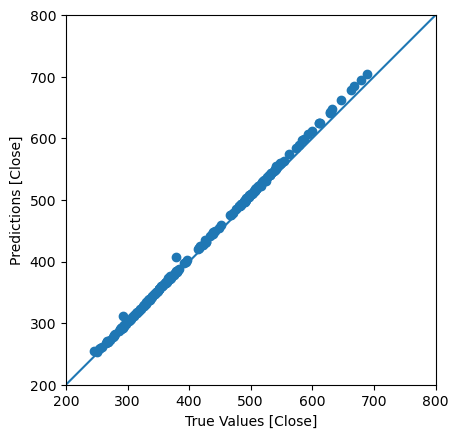

In [105]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Close]')
plt.ylabel('Predictions [Close]')
lims = [200, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

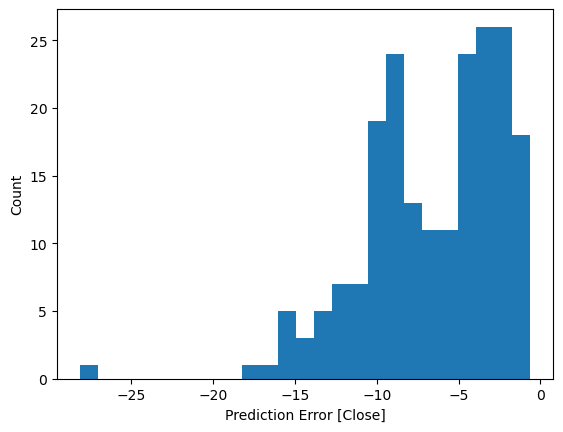

In [106]:
error = y_test - test_predictions
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Close]')
_ = plt.ylabel('Count')